-2020.11.21：将和沪深300指数比对改为直接取涨幅最高的percent

-2020.11.21: 等权分配改为可赋值的权值

In [2]:
import numpy as np
import pandas as pd

In [14]:
class Para:
    path_data = '20171103_20201103.xlsx'
    range_data = range(3,13)
    hold_time = range(3,13)
    percent = 0.1
para = Para()

In [4]:
number = 29
new_columns = range(number)
data_processed = pd.read_excel(para.path_data, 'Sheet1', index_col=None, na_values=['NA'],names = new_columns, header=0) #待处理数据
data_processed = data_processed.dropna(axis=0)

In [15]:
def function(range_data,hold_time,percent):
    value_df = np.zeros([len(range_data),len(hold_time)])
    value_df = pd.DataFrame(data = value_df, index = range_data, columns = hold_time)
    value_df.index.name = '样本时间'
    value_df.columns.name = '持股时间'

    for index in range_data:

        for columns in hold_time:

            #循环次数
            count = int((data_processed.shape[0]-2)/(index+columns))
            for i in range(count):
                section = int(2+(index+columns)*i)
                
                #均值
                mean_data = np.mean(data_processed.iloc[section:section+index,1:])
                mean_data = mean_data.sort_values(ascending = False)
                selected_data = mean_data.iloc[:int(mean_data.shape[0]*percent)]
                selected_names = selected_data.index
                print(str(count)+str(selected_names))
                
                names = selected_names.to_numpy() 

                selected_data = data_processed[data_processed.index[names-1]]
                selected_data = np.mean(selected_data.iloc[section+index:section+index+columns,:])
                selected_data = np.mean(selected_data.T)
                value_df[index][columns] = selected_data
    return value_df

a = function(para.range_data,para.hold_time,para.percent)

25Int64Index([25, 26], dtype='int64')
25Int64Index([14, 2], dtype='int64')
25Int64Index([4, 16], dtype='int64')
25Int64Index([22, 21], dtype='int64')
25Int64Index([11, 8], dtype='int64')
25Int64Index([4, 7], dtype='int64')
25Int64Index([4, 19], dtype='int64')
25Int64Index([21, 14], dtype='int64')
25Int64Index([26, 14], dtype='int64')
25Int64Index([8, 19], dtype='int64')
25Int64Index([8, 7], dtype='int64')
25Int64Index([17, 22], dtype='int64')
25Int64Index([8, 24], dtype='int64')
25Int64Index([5, 25], dtype='int64')
25Int64Index([1, 21], dtype='int64')
25Int64Index([8, 21], dtype='int64')
25Int64Index([25, 18], dtype='int64')
25Int64Index([18, 4], dtype='int64')
25Int64Index([5, 23], dtype='int64')
25Int64Index([22, 6], dtype='int64')
25Int64Index([1, 11], dtype='int64')
25Int64Index([6, 7], dtype='int64')
25Int64Index([11, 23], dtype='int64')
25Int64Index([21, 5], dtype='int64')
25Int64Index([27, 20], dtype='int64')
22Int64Index([25, 26], dtype='int64')
22Int64Index([14, 8], dtype='int

14Int64Index([6, 11], dtype='int64')
14Int64Index([7, 1], dtype='int64')
14Int64Index([6, 22], dtype='int64')
14Int64Index([8, 11], dtype='int64')
14Int64Index([16, 26], dtype='int64')
14Int64Index([27, 20], dtype='int64')
12Int64Index([4, 18], dtype='int64')
12Int64Index([4, 16], dtype='int64')
12Int64Index([11, 8], dtype='int64')
12Int64Index([19, 4], dtype='int64')
12Int64Index([17, 26], dtype='int64')
12Int64Index([7, 8], dtype='int64')
12Int64Index([8, 7], dtype='int64')
12Int64Index([6, 1], dtype='int64')
12Int64Index([25, 11], dtype='int64')
12Int64Index([23, 5], dtype='int64')
12Int64Index([1, 11], dtype='int64')
12Int64Index([16, 26], dtype='int64')
11Int64Index([4, 18], dtype='int64')
11Int64Index([22, 6], dtype='int64')
11Int64Index([8, 16], dtype='int64')
11Int64Index([24, 26], dtype='int64')
11Int64Index([1, 17], dtype='int64')
11Int64Index([22, 17], dtype='int64')
11Int64Index([5, 25], dtype='int64')
11Int64Index([22, 24], dtype='int64')
11Int64Index([6, 4], dtype='int64'

11Int64Index([26, 5], dtype='int64')
11Int64Index([6, 22], dtype='int64')
11Int64Index([5, 18], dtype='int64')
11Int64Index([1, 18], dtype='int64')
11Int64Index([16, 23], dtype='int64')
11Int64Index([4, 7], dtype='int64')
11Int64Index([22, 11], dtype='int64')
11Int64Index([16, 8], dtype='int64')
11Int64Index([2, 25], dtype='int64')
11Int64Index([8, 7], dtype='int64')
11Int64Index([8, 1], dtype='int64')
11Int64Index([1, 6], dtype='int64')
11Int64Index([7, 11], dtype='int64')
11Int64Index([6, 22], dtype='int64')
11Int64Index([16, 6], dtype='int64')
11Int64Index([8, 27], dtype='int64')
10Int64Index([4, 7], dtype='int64')
10Int64Index([22, 21], dtype='int64')
10Int64Index([4, 16], dtype='int64')
10Int64Index([26, 25], dtype='int64')
10Int64Index([6, 1], dtype='int64')
10Int64Index([25, 5], dtype='int64')
10Int64Index([6, 22], dtype='int64')
10Int64Index([5, 6], dtype='int64')
10Int64Index([8, 11], dtype='int64')
10Int64Index([16, 21], dtype='int64')
9Int64Index([4, 7], dtype='int64')
9Int6

12Int64Index([8, 16], dtype='int64')
12Int64Index([2, 25], dtype='int64')
12Int64Index([17, 14], dtype='int64')
12Int64Index([1, 6], dtype='int64')
12Int64Index([8, 25], dtype='int64')
12Int64Index([6, 21], dtype='int64')
12Int64Index([25, 18], dtype='int64')
12Int64Index([6, 22], dtype='int64')
12Int64Index([8, 11], dtype='int64')
12Int64Index([16, 21], dtype='int64')
11Int64Index([8, 14], dtype='int64')
11Int64Index([22, 11], dtype='int64')
11Int64Index([8, 16], dtype='int64')
11Int64Index([2, 25], dtype='int64')
11Int64Index([24, 20], dtype='int64')
11Int64Index([22, 26], dtype='int64')
11Int64Index([26, 5], dtype='int64')
11Int64Index([22, 11], dtype='int64')
11Int64Index([5, 23], dtype='int64')
11Int64Index([1, 18], dtype='int64')
11Int64Index([16, 21], dtype='int64')
11Int64Index([8, 14], dtype='int64')
11Int64Index([22, 21], dtype='int64')
11Int64Index([16, 8], dtype='int64')
11Int64Index([26, 25], dtype='int64')
11Int64Index([8, 7], dtype='int64')
11Int64Index([8, 7], dtype='in

6Int64Index([1, 17], dtype='int64')
6Int64Index([8, 1], dtype='int64')
6Int64Index([7, 6], dtype='int64')
6Int64Index([1, 18], dtype='int64')
10Int64Index([14, 7], dtype='int64')
10Int64Index([22, 11], dtype='int64')
10Int64Index([4, 25], dtype='int64')
10Int64Index([1, 14], dtype='int64')
10Int64Index([1, 22], dtype='int64')
10Int64Index([8, 21], dtype='int64')
10Int64Index([6, 7], dtype='int64')
10Int64Index([6, 22], dtype='int64')
10Int64Index([8, 11], dtype='int64')
10Int64Index([16, 21], dtype='int64')
9Int64Index([14, 7], dtype='int64')
9Int64Index([11, 22], dtype='int64')
9Int64Index([21, 25], dtype='int64')
9Int64Index([17, 24], dtype='int64')
9Int64Index([1, 8], dtype='int64')
9Int64Index([6, 8], dtype='int64')
9Int64Index([7, 18], dtype='int64')
9Int64Index([1, 11], dtype='int64')
9Int64Index([16, 11], dtype='int64')
9Int64Index([14, 7], dtype='int64')
9Int64Index([11, 22], dtype='int64')
9Int64Index([25, 26], dtype='int64')
9Int64Index([1, 24], dtype='int64')
9Int64Index([8,

In [16]:
a #策略平均涨跌幅

持股时间,3,4,5,6,7,8,9,10,11,12
样本时间,,,,,,,,,,
3,0.549914,-0.920267,1.679698,1.387407,-1.158666,2.050481,-1.588721,-2.964021,2.050481,-0.611875
4,0.418540,-0.277592,2.224330,0.636998,2.017788,0.276651,1.247030,2.017788,0.539315,-0.899558
5,0.390748,0.330838,-0.629394,0.115121,1.428454,0.779405,2.561250,-0.786202,1.428454,0.868977
6,0.968660,-0.676663,0.440147,2.132992,-0.814369,1.955921,-0.672199,0.501536,0.245947,1.290371
7,-0.514077,1.388699,-0.465286,1.313102,0.949950,-0.268435,-0.465286,0.719096,0.212204,-1.151509
8,1.043659,1.405580,3.045104,1.400223,-0.587698,1.281312,0.015516,1.637542,-1.020343,3.118773
9,1.598108,2.706957,-0.307382,-0.977706,3.352222,-0.673841,3.198318,-0.667622,3.119310,0.721177
10,2.780253,-0.367944,-0.292659,2.465371,-1.095756,2.932107,-0.883113,3.135674,0.023380,-0.667278
11,-0.613272,0.282643,2.546645,-1.621036,3.012844,-1.175355,2.796769,1.077155,-0.410785,1.085191


In [23]:
#画图
import matplotlib.pyplot as plt

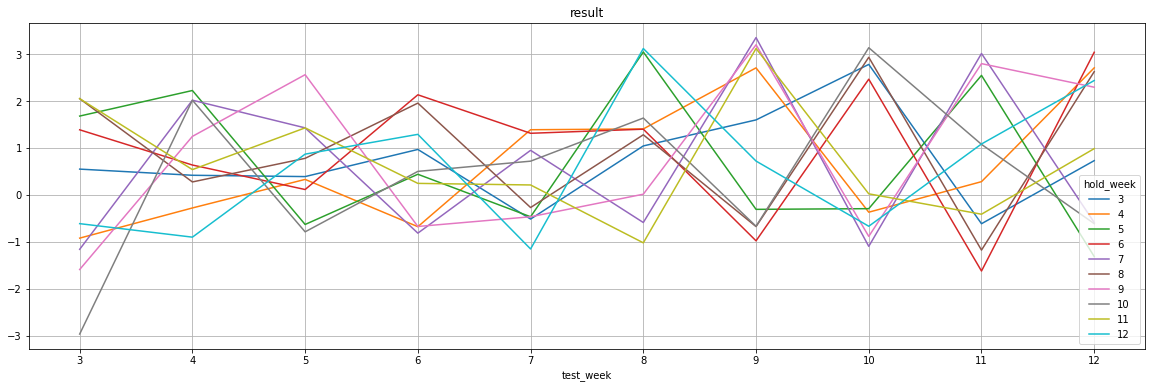

In [63]:
a.index.name = 'test_week'
a.columns.name = 'hold_week'
result = a.plot(title = 'result',figsize = (20,6),grid = True,xticks = para.range_data,legend = True)